<a href="https://colab.research.google.com/github/miguelaram2016/FreeCodeCamp-Projects/blob/main/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-03-27 03:04:46--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  29.9MB/s    in 0.8s    

2025-03-27 03:04:47 (29.9 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
# add your code here - consider creating a new cell for each section of code

df = df_ratings

user_counts = df['user'].value_counts()
isbn_counts = df['isbn'].value_counts()

df = df[~df['user'].isin(user_counts[user_counts < 200].index)]
df = df[~df['isbn'].isin(isbn_counts[isbn_counts < 100].index)]

df = pd.merge(right = df, left = df_books, on="isbn")

df = df.drop_duplicates(["title", "user"])

pivot_table = df.pivot(index='title', columns='user', values='rating').fillna(0)

matrix = pivot_table.values

model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [5]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

  book_and_ratings = pivot_table.loc[book].array.reshape(1, -1)

  distances, indices = model.kneighbors(book_and_ratings, n_neighbors = 6)

  recommended_books=[]

  for distance, index in zip(distances[0], indices[0]):
    if distance != 0:
      recommended_book = pivot_table.index[index]
      recommended_books.append([recommended_book, distance])

  recommended_books=[book, recommended_books[::-1]]

  return recommended_books

In [6]:
def pretty_print_recommendations(recommendation_result):
    book, recommendations = recommendation_result
    print(f"📘 Recommendations for: {book}\n")
    for title, dist in recommendations:
        print(f"→ {title}, Similarity score {dist}")

pretty_print_recommendations(get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))"))


📘 Recommendations for: The Queen of the Damned (Vampire Chronicles (Paperback))

→ Catch 22, Similarity score 0.7939835419270879
→ The Witching Hour (Lives of the Mayfair Witches), Similarity score 0.7448657003312193
→ Interview with the Vampire, Similarity score 0.7345068863988313
→ The Tale of the Body Thief (Vampire Chronicles (Paperback)), Similarity score 0.5376338446489461
→ The Vampire Lestat (Vampire Chronicles, Book II), Similarity score 0.5178411864186412
→ The Queen of the Damned (Vampire Chronicles (Paperback)), Similarity score 1.1102230246251565e-16


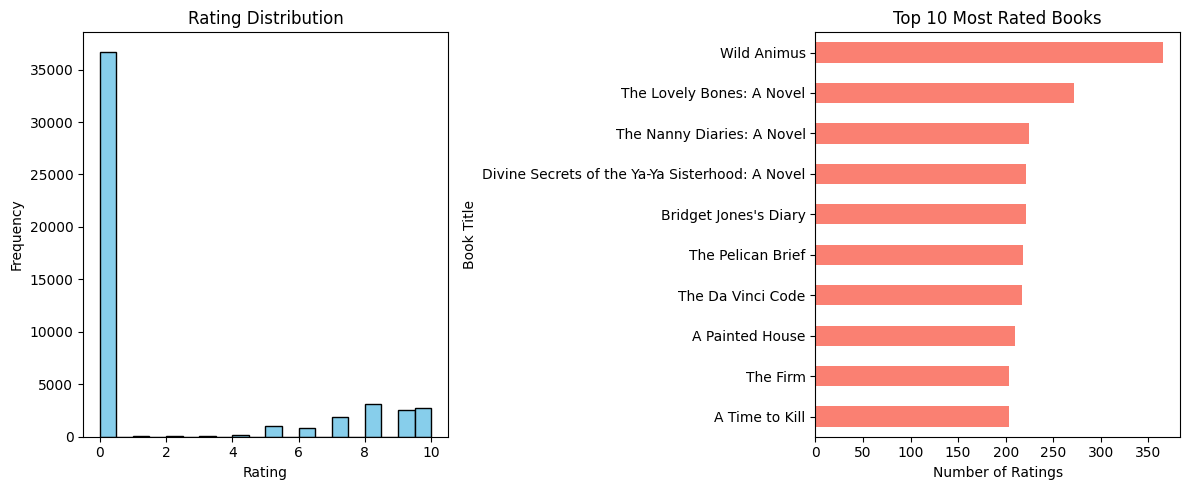

In [12]:
def graph_dataset():

    plt.figure(figsize=(12, 5))

    # Rating Distribution - A histogram showing the distribution of ratings
    plt.subplot(1, 2, 1)
    plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")

    # Top 10 Most Rated Books - A horizontal bar chart displaying the top 10 most rated books
    plt.subplot(1, 2, 2)
    top_books = df['title'].value_counts().head(10)
    top_books.plot(kind='barh', color='salmon')
    plt.title("Top 10 Most Rated Books")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Book Title")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Call the function to graph the dataset.
graph_dataset()


In [13]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True', 'The Lovely Bones: A Novel']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77, 0.72]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", np.float64(0.8016210581447822)], ['The Weight of Water', np.float64(0.7708583572697412)], ['The Surgeon', np.float64(0.7699410973804288)], ['I Know This Much Is True', np.float64(0.7677075092617776)], ['The Lovely Bones: A Novel', np.float64(0.7234864549790632)], ["Where the Heart Is (Oprah's Book Club (Paperback))", np.float64(2.220446049250313e-16)]]]
You passed the challenge! 🎉🎉🎉🎉🎉
